In [11]:
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

# Evaluation using test data from train_test_split


In [2]:
label_df = pd.read_csv(
    "../../data/processed/combined/combined_label.csv", index_col=False
)

label_df["expression_label"] = label_df["expression_label"].astype("category")

In [3]:
def load_data(dir_path, img_size):
    X = []

    for index, row in label_df.iterrows():
        image_path = os.path.join(dir_path, row["image_name"])
        img = cv2.imread(image_path)
        img = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA).astype("float32")

        X.append(img)

    X = np.array(X)
    dummies = pd.get_dummies(label_df["expression_label"])

    return X, dummies.values

In [4]:
IMG_SIZE = (96, 96)
data_dir = "../../data/processed/combined/img/"

X, y = load_data(data_dir, IMG_SIZE)

In [5]:
train_ratio = 0.60
test_ratio = 0.20
validation_ratio = 0.20


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_ratio, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=validation_ratio / (train_ratio + test_ratio),
    random_state=42,
)

In [6]:
# only normalize/standardize for validation and test set
test_datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

# get batch iterator for test (use only once for evaluation)
test_iterator = test_datagen.flow(X_test, y_test, batch_size=128)

In [7]:
model = load_model("../../model/240620_mobilenetv2_model.keras")

In [8]:
eval = model.evaluate(test_iterator)

e:\Documents\HSLU\Studium\Workspaces\Python\DSPRO2\emotion_recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 161ms/step - categorical_accuracy: 0.5252 - loss: 1.3429


In [18]:
def samplewise_standardization(X):
    return (X - np.mean(X)) / np.std(X)



In [19]:
X_test_normalized = samplewise_standardization(X_test)

y_pred = model.predict(X_test_normalized)
true_class = tf.argmax(y_test, 1)
predicted_class = tf.argmax(y_pred, 1)

420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step


[Text(0, 0.5, 'angry'),
 Text(0, 1.5, 'disgust'),
 Text(0, 2.5, 'fear'),
 Text(0, 3.5, 'happy'),
 Text(0, 4.5, 'neutral'),
 Text(0, 5.5, 'sad'),
 Text(0, 6.5, 'surprise')]

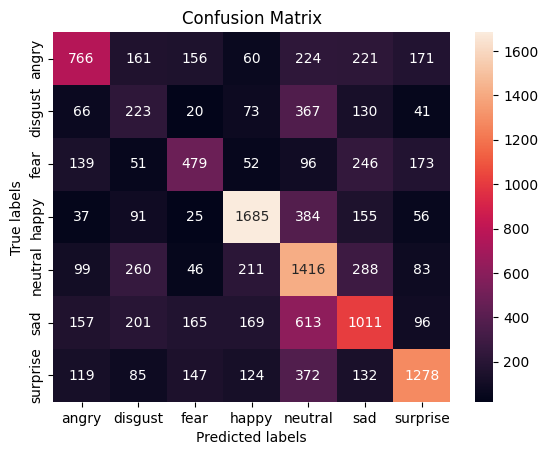

In [20]:
cm = confusion_matrix(true_class, predicted_class)

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt="g", ax=ax)

# labels, title and ticks

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")

ax.xaxis.set_ticklabels(
    ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
)

ax.yaxis.set_ticklabels(
    ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
)

# Evaluation on own created test set


In [35]:
label_ai_df = pd.read_csv(
    "../../data/processed/ai_generated/labels.csv", index_col=False
)

label_ai_df

,image_name,expression_label
0,happy_0.jpg,happy
1,angry_1.jpg,angry
2,disgust_2.jpg,disgust
3,neutral_3.jpg,neutral
4,angry_4.jpg,angry
...,...,...
61,fear_61.jpg,fear
62,neutral_62.jpg,neutral
63,happy_63.jpg,happy
64,happy_64.jpg,happy


In [36]:
label_ai_df["expression_label"] = label_df["expression_label"].astype("category")

label_ai_df.dtypes

image_name            object
expression_label    category
dtype: object

In [38]:
data_dir_ai = "../../data/processed/ai_generated/img/"

X_test_ai, y_test_ai = load_data(data_dir_ai, IMG_SIZE)

KeyboardInterrupt: 

In [33]:
img = cv2.imread("../../data/processed/ai_generated/img/angry_1.jpg")

img

array([[[ 3,  3,  3],
        [ 4,  4,  4],
        [12, 12, 12],
        ...,
        [ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3]],

       [[ 4,  4,  4],
        [ 9,  9,  9],
        [13, 13, 13],
        ...,
        [ 0,  0,  0],
        [ 4,  4,  4],
        [ 3,  3,  3]],

       [[ 3,  3,  3],
        [ 6,  6,  6],
        [ 9,  9,  9],
        ...,
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 5,  5,  5]],

       ...,

       [[30, 30, 30],
        [32, 32, 32],
        [27, 27, 27],
        ...,
        [ 7,  7,  7],
        [ 3,  3,  3],
        [ 7,  7,  7]],

       [[19, 19, 19],
        [31, 31, 31],
        [26, 26, 26],
        ...,
        [ 8,  8,  8],
        [ 3,  3,  3],
        [12, 12, 12]],

       [[24, 24, 24],
        [36, 36, 36],
        [21, 21, 21],
        ...,
        [12, 12, 12],
        [20, 20, 20],
        [ 9,  9,  9]]], dtype=uint8)

In [ ]:
X_test_ai_normalized = samplewise_standardization(X_test_ai)

y_pred_ai = model.predict(X_test_ai_normalized)
true_class_ai = tf.argmax(y_test, 1)
predicted_class_ai = tf.argmax(y_pred_ai, 1)